In [1]:
import numpy as np
import pandas as pd 

In [2]:
#importing Fake news data file
fake=pd.read_csv('Fake.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
#importing True news data file
true=pd.read_csv('True.csv')
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
#addibng lable 
fake["lable"]=0
true["lable"]=1

In [5]:
#merging fake and ture data file into single file (we are taking only 2000 rows from each dataset)
#so that model can be run easily 
news=pd.concat([fake.iloc[:2000,:],true.iloc[:2000,:]],axis=0,ignore_index=True)

In [6]:
news.head()

,title,text,subject,date,lable
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [7]:
#checking elements in subject
news.subject.unique()

array(['News', 'politicsNews'], dtype=object)

In [8]:
#checking for any missing obersvation 
news.isnull().sum()

title      0
text       0
subject    0
date       0
lable      0
dtype: int64

In [9]:
#droping unnecessary elemnts 
news.drop(["title","subject","date"],axis=1,inplace=True)

In [10]:
news.head()

,text,lable
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [11]:
news.text[4]

'Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentioning his name. The Pope delivered his message just days after members of the United Nations condemned Trump s move to recognize Jerusalem as the capital of Israel. The Pontiff prayed on Monday for the  peaceful coexistence of two states within mutually agreed and internationally recognized borders. We see Jesus in the children of the Middle East who continue to suffer because of growing tensions between Israelis and Palestinians,  Francis said.  On this festive day, let us ask the Lord for peace for Jerusalem and for all the Holy Land. Let us pray that the will to resume dialogue may prevail between the parties and that a negotiated solution can finally be reached. The Pope went on to plead for acceptance of refugees who have been forced from their homes, and that is an issue Trump continues to fight against. Francis used Jesus for which there was  no place in the inn  as an analogy. Today, as

In [12]:
#for model we are creating variables x which contains news text 
x=news.drop(["lable"],axis=1)
x.head

<bound method NDFrame.head of                                                    text
0     Donald Trump just couldn t wish all Americans ...
1     House Intelligence Committee Chairman Devin Nu...
2     On Friday, it was revealed that former Milwauk...
3     On Christmas day, Donald Trump announced that ...
4     Pope Francis used his annual Christmas Day mes...
...                                                 ...
3995  WASHINGTON (Reuters) - U.S. President Donald T...
3996  WASHINGTON (Reuters) - U.S. House of Represent...
3997  ALMATY (Reuters) - United States Energy Secret...
3998  WASHINGTON (Reuters) - Donald Trump’s company ...
3999  WASHINGTON (Reuters) - U.S. President Donald T...

[4000 rows x 1 columns]>

In [13]:
# y variable contain labels (news is fake or ture )
y=news.drop(["text"],axis=1)
y.head()
y.shape

(4000, 1)

In [14]:
#imporing Packges for NLTK( Natural Language Toolkit)
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re


#importing Sklearn model 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer


In [15]:
#this code will elemnate all unecessery part form text removing all punchuation and signs 
ps=PorterStemmer()
corpus=[]
for i in range (0,len(x)):
    review=re.sub("[^a-zA-Z]"," ",x["text"][i])   
    review=review.lower() #will convert all uper case alphabets into lower case 
    review=review.split() 
    
    review=[ps.stem(word) for word in review if word not in stopwords.words("english")]
    review = " ".join(review)
    corpus.append(review)

In [16]:
corpus

['donald trump wish american happi new year leav instead give shout enemi hater dishonest fake news media former realiti show star one job countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news media happi healthi new year presid angri pant tweet great year america countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news media happi healthi new year great year america donald j trump realdonaldtrump decemb trump tweet went welll expect kind presid send new year greet like despic petti infantil gibberish trump lack decenc even allow rise gutter long enough wish american citizen happi new year bishop talbert swan talbertswan decemb one like calvin calvinstowel decemb impeach would make great year america also accept regain control congress miranda yaver mirandayav decemb hear talk includ mani peopl hate wonder hate alan sandov alansandov decemb use word hater new year wish marlen marlen decemb say happ

In [17]:
#using TfidVectorizer which converrt text into matxics
vector = TfidfVectorizer(max_features =5000, ngram_range=(1,3))

#tranfroming matrix into array
X = vector.fit_transform(corpus).toarray()


In [18]:
X.shape

(4000, 5000)

In [19]:
#splitng model into train and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [20]:
X_train.shape

(2800, 5000)

In [21]:
#we are using Naive bayes classifer 
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

#Multinomial Naive Bayes
classifier=MultinomialNB()

In [22]:
#fiting Model 
classifier.fit(X_train, y_train)
#predicting Output 
pred = classifier.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [23]:
#checking accurecy score of model 
score = metrics.accuracy_score(y_test, pred)

In [24]:
score

0.9808333333333333

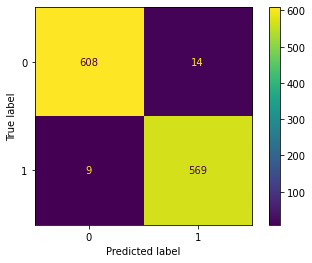

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(y_test, pred)
metrics.plot_confusion_matrix(classifier,X_test,y_test)

In [26]:
#form the graph we say that we 14 newes which was fake we predicted as true
#form the graph we say that we 9 newes which was true we predicted as fake


# checking for New data

In [27]:
n2=pd.read_csv("news.csv")
n2.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [28]:
n2clean=n2.drop(["Unnamed: 0","title"],axis=1)

In [29]:
n2clean.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


In [30]:
x2=n2clean.drop(["label"],axis=1)
x2.head()

,text
0,"Daniel Greenfield, a Shillman Journalism Fello..."
1,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,U.S. Secretary of State John F. Kerry said Mon...
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,It's primary day in New York and front-runners...


In [31]:
y2=n2clean.drop(["text"],axis=1)
y2.head

<bound method NDFrame.head of      label
0     FAKE
1     FAKE
2     REAL
3     FAKE
4     REAL
...    ...
6330  REAL
6331  FAKE
6332  FAKE
6333  REAL
6334  REAL

[6335 rows x 1 columns]>

In [32]:
y2_new=y2.replace(to_replace = ('FAKE','REAL'), value =(0,1))
y2_new.shape

(6335, 1)

In [33]:
y2_

In [55]:
ps=PorterStemmer()
corpus2=[]
for i in range (0,len(x2)):
    review=re.sub("[^a-zA-Z]"," ",x2["text"][i])
    review=review.lower()
    review=review.split()
    
    review=[ps.stem(word) for word in review if word not in stopwords.words("english")]
    review = " ".join(review)
    corpus2.append(review)

In [56]:
X2= vector.fit_transform(corpus2).toarray()


In [58]:
pred2 = classifier.predict(X2)
pred2.shape

(6335,)

In [62]:
score = metrics.accuracy_score(y2_new, pred2)

In [38]:
score

0.508

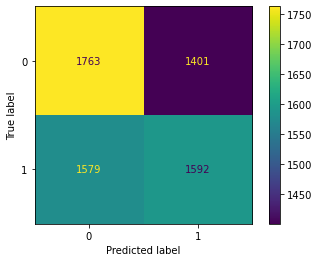

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(y2_new, pred2)
metrics.plot_confusion_matrix(classifier,X2,y2_new)

In [41]:
n3=pd.read_csv("news3.csv")
n3.head()

,title,text,subject,date,labels
0,al race,it s certainly an old lesson by now. Dependin...,Karl Marx is either a villain or a hero of so...,but he left us some interesting quotes. Marx ...,Fake
1,e more time. In the film s final surreal sequence,we see Mickey and Mallory driving in an RV as...,a future nuclear family,one without traditional moral values,Fake
2,"WHEN IN ROME: Erdogan Thugs Rough-up Press, Pr...","21st Century Wire says NATO s ugly stepchild, ...",Middle-east,"April 1, 2016",Fake
3,SUNDAY SCREENING: ‘The War On Democracy’,21st Century Wire says This is the latest inst...,Middle-east,"April 10, 2016",Fake
4,First Time in 30 Years: US Deploys B-52 Bomber...,21st Century Wire says Is Washington preparing...,Middle-east,"April 10, 2016",Fake


In [42]:
n3.drop(["title","subject","date"],axis=1,inplace=True)

In [45]:
x3=n3.drop(["labels"],axis=1)
x3.head()

,text
0,it s certainly an old lesson by now. Dependin...
1,we see Mickey and Mallory driving in an RV as...
2,"21st Century Wire says NATO s ugly stepchild, ..."
3,21st Century Wire says This is the latest inst...
4,21st Century Wire says Is Washington preparing...


In [46]:
y3=n3.drop(["text"],axis=1)
y3.head

<bound method NDFrame.head of      labels
0      Fake
1      Fake
2      Fake
3      Fake
4      Fake
...     ...
1002   Fake
1003   Fake
1004   Fake
1005   Fake
1006   Fake

[1007 rows x 1 columns]>

In [74]:
y3_new=y3.replace(to_replace = ('Fake','True'), value =(0,1))
y3_new.shape

(1007, 1)

In [49]:
ps=PorterStemmer()
corpus3=[]
for i in range (0,len(x3)):
    review=re.sub("[^a-zA-Z]"," ",x3["text"][i])
    review=review.lower()
    review=review.split()
    
    review=[ps.stem(word) for word in review if word not in stopwords.words("english")]
    review = " ".join(review)
    corpus3.append(review)

In [50]:
X3= vector.fit_transform(corpus3).toarray()


In [54]:
pred3 = classifier.predict(X3)
pred3.shape

(1007,)

In [78]:
pred3

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [75]:
y3_new.head()

,labels
0,0
1,0
2,0
3,0
4,0


In [76]:
score = metrics.accuracy_score(y3_new, pred3)

ValueError: Classification metrics can't handle a mix of unknown and binary targets

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(y3_new, pred3)
metrics.plot_confusion_matrix(classifier,X3,y3_new)

ValueError: Classification metrics can't handle a mix of unknown and binary targets

# end